# Tidy3D mode solver

## Waveguides

In [1]:
import gdsfactory.simulation.gtidy3d as gt

2022-06-30 06:19:55.206 | INFO     | gdsfactory.config:<module>:52 - Load '/home/runner/work/gdsfactory/gdsfactory/gdsfactory' 5.12.4


2022-06-30 06:19:57.075 | INFO     | gdsfactory.simulation.gtidy3d:<module>:52 - Tidy3d '1.4.1' installed at ['/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d']


<Figure size 432x288 with 2 Axes>

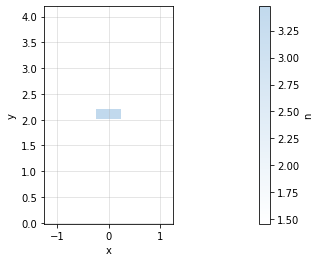

In [2]:
strip = gt.modes.Waveguide(wavelength=1.55, wg_width=0.5, wg_thickness=0.22, slab_thickness=0.0, ncore=gt.modes.si, nclad=gt.modes.sio2)
strip.plot_index()

2022-06-30 06:19:57.382 | INFO     | gdsfactory.simulation.gtidy3d.modes:compute_modes:338 - load /home/runner/work/gdsfactory/gdsfactory/gdslib/modes/92a656b7.npz mode data from file cache.


<Figure size 432x288 with 3 Axes>

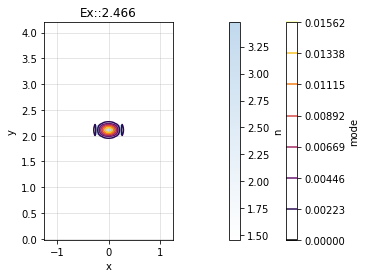

<Figure size 432x288 with 3 Axes>

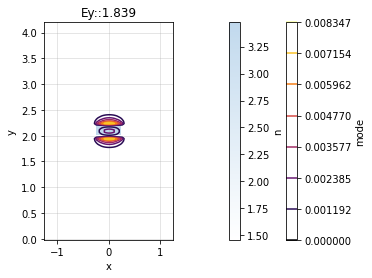

In [3]:
strip.plot_Ex(0)  # TE
strip.plot_Ey(1)  # TM

<Figure size 432x288 with 2 Axes>

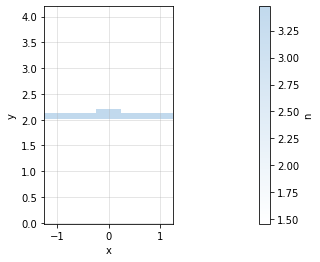

In [4]:
rib = gt.modes.Waveguide(wavelength=1.55, wg_width=0.5, wg_thickness=0.22, slab_thickness=0.15, ncore=gt.modes.si, nclad=gt.modes.sio2)
rib.plot_index()

2022-06-30 06:19:58.376 | INFO     | gdsfactory.simulation.gtidy3d.modes:compute_modes:338 - load /home/runner/work/gdsfactory/gdsfactory/gdslib/modes/6058baa7.npz mode data from file cache.


<Figure size 432x288 with 3 Axes>

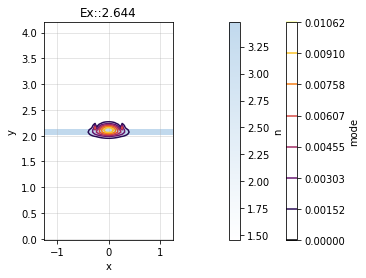

<Figure size 432x288 with 3 Axes>

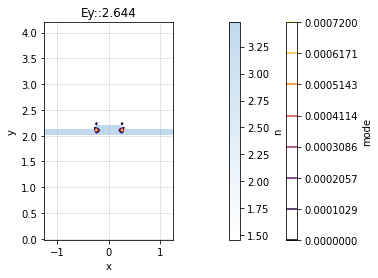

In [5]:
rib.plot_Ex(mode_index=0)
rib.plot_Ey(mode_index=0)

<Figure size 432x288 with 2 Axes>

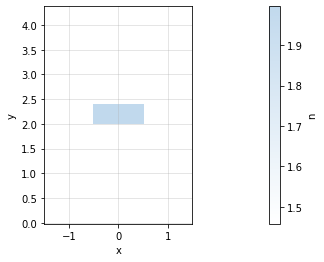

2022-06-30 06:19:59.176 | INFO     | gdsfactory.simulation.gtidy3d.modes:compute_modes:338 - load /home/runner/work/gdsfactory/gdsfactory/gdslib/modes/bc674083.npz mode data from file cache.


<Figure size 432x288 with 3 Axes>

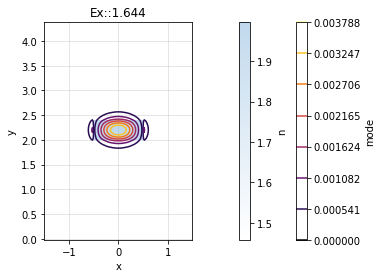

<Figure size 432x288 with 3 Axes>

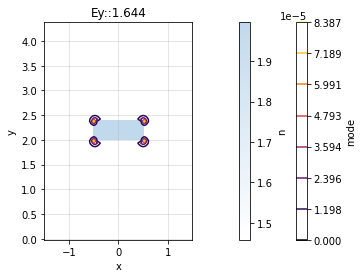

In [6]:
nitride = gt.modes.Waveguide(wavelength=1.55, wg_width=1.0, wg_thickness=0.4, slab_thickness=0.0, ncore=gt.modes.sin, nclad=gt.modes.sio2)
nitride.plot_index()
nitride.plot_Ex(0)
nitride.plot_Ey(0)

## Bend modes

You can compute bend modes specifying the bend radius.

In [7]:
strip_bend = gt.modes.Waveguide(
    wavelength=1.55, wg_width=0.5, wg_thickness=0.22, slab_thickness=0.0, bend_radius=3, ncore=gt.modes.si, nclad=gt.modes.sio2
)

2022-06-30 06:19:59.802 | INFO     | gdsfactory.simulation.gtidy3d.modes:compute_modes:338 - load /home/runner/work/gdsfactory/gdsfactory/gdslib/modes/0b8840ae.npz mode data from file cache.


<Figure size 432x288 with 3 Axes>

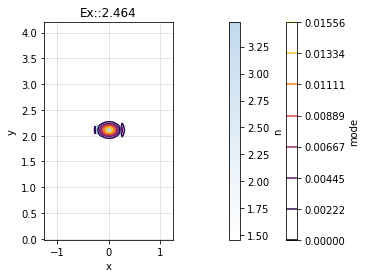

<Figure size 432x288 with 3 Axes>

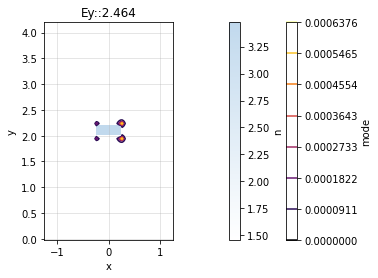

In [8]:
# lets plot the fundamental TE mode
strip_bend.plot_Ex(0)
strip_bend.plot_Ey(0)

<Figure size 432x288 with 3 Axes>

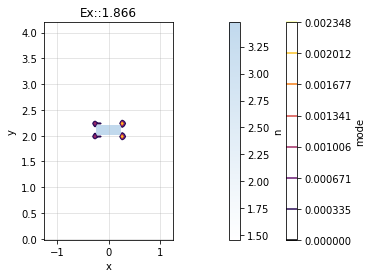

<Figure size 432x288 with 3 Axes>

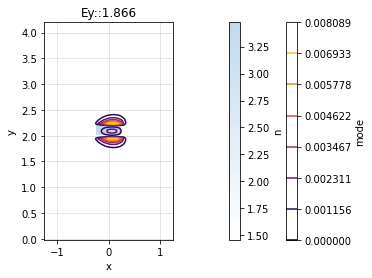

In [9]:
# lets plot the fundamental TM mode
strip_bend.plot_Ex(1)
strip_bend.plot_Ey(1)

## Bend loss

You can also compute the losses coming from the mode mismatch from the bend into a straight waveguide.
To compute the bend loss due to mode mismatch you can calculate the mode overlap of the straight mode and the bent mode.
Because there are two mode mismatch interfaces the total loss due to mode mismatch will be squared (from bend to straight and from straight to bend).


0it [00:00, ?it/s]

2022-06-30 06:20:01.227 | INFO     | gdsfactory.simulation.gtidy3d.modes:compute_modes:338 - load /home/runner/work/gdsfactory/gdsfactory/gdslib/modes/92a656b7.npz mode data from file cache.


2022-06-30 06:20:01.312 | INFO     | gdsfactory.simulation.gtidy3d.modes:compute_modes:338 - load /home/runner/work/gdsfactory/gdsfactory/gdslib/modes/ae71c86b.npz mode data from file cache.


2022-06-30 06:20:01.392 | INFO     | gdsfactory.simulation.gtidy3d.modes:compute_modes:338 - load /home/runner/work/gdsfactory/gdsfactory/gdslib/modes/0b8840ae.npz mode data from file cache.


2022-06-30 06:20:01.489 | INFO     | gdsfactory.simulation.gtidy3d.modes:compute_modes:338 - load /home/runner/work/gdsfactory/gdsfactory/gdslib/modes/35faed94.npz mode data from file cache.


2022-06-30 06:20:01.587 | INFO     | gdsfactory.simulation.gtidy3d.modes:compute_modes:338 - load /home/runner/work/gdsfactory/gdsfactory/gdslib/modes/183b11e9.npz mode data from file cache.


<Figure size 432x288 with 1 Axes>

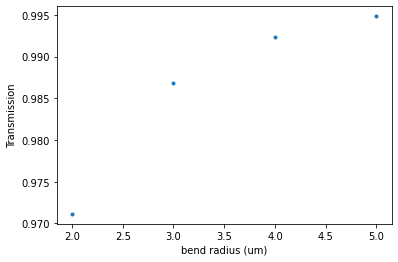

In [10]:
import gdsfactory.simulation.gtidy3d as gt
import matplotlib.pyplot as plt

r, integral = gt.modes.sweep_bend_loss(wavelength=1.55, wg_width=0.5, wg_thickness=0.22, slab_thickness=0.0, ncore=gt.modes.si, nclad=gt.modes.sio2, bend_radius_min = 2.0, bend_radius_max = 5, steps = 4, mode_index = 0)

plt.plot(r, integral, ".")
plt.xlabel("bend radius (um)")
plt.ylabel("Transmission")
plt.show()